In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import dill as pickle
from rich import print

%matplotlib inline

In [2]:
perfile = "performance.csv"
df = pd.read_csv(perfile)
df.columns = [col.strip() for col in df.columns]

print(df)

Unnamed: 0  hidden_nodes  learning_rate  epochs  performance  \
0             0          10.0           0.01     1.0       0.8140   
1             1          10.0           0.01    10.0       0.9056   
2             2          10.0           0.01    15.0       0.9045   
3             3          10.0           0.01     2.0       0.8780   
4             4          10.0           0.01    20.0       0.9069   
..          ...           ...            ...     ...          ...   
955         955         500.0           0.90     5.0       0.8781   
956         956         500.0           0.90     6.0       0.8610   
957         957         500.0           0.90     7.0       0.8483   
958         958         500.0           0.90     8.0       0.8656   
959         959         500.0           0.90     9.0       0.8380   

     training_time  
0            12.77  
1           123.15  
2           226.21  
3            24.63  
4           474.00  
..             ...  
955         424.96  
956         507.29  
957         570.75  
958         643.84  
959         716.75  

[960 rows x 6 columns]

In [3]:
hidden_nodes = sorted([int(i) for i in set(df['hidden_nodes'].to_list())])
learning_rate = sorted([float(i) for i in set(df['learning_rate'].to_list())])
epochs = sorted([int(i) for i in set(df['epochs'].to_list())])
print(f"{hidden_nodes = }")
print(f"{learning_rate = }")
print(f"{epochs = }")

hidden_nodes = [10, 20, 50, 100, 200, 300, 400, 500]

learning_rate = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

In [4]:
performance = df['performance'].to_numpy()
print(f"{performance.max() = :.4f}")

performance.max() = 0.9787

In [6]:
maxcondition = df.iloc[performance.argmax()].to_dict()
print(maxcondition)

{
    'Unnamed: 0': 844.0,
    'hidden_nodes': 500.0,
    'learning_rate': 0.01,
    'epochs': 20.0,
    'performance': 0.9787,
    'training_time': 1957.56
}

clf.lr = 0.01

clf.epochs = 20

clf.hnodes = 500

clf.performance = 0.9787

clf.training_time = 1957.56

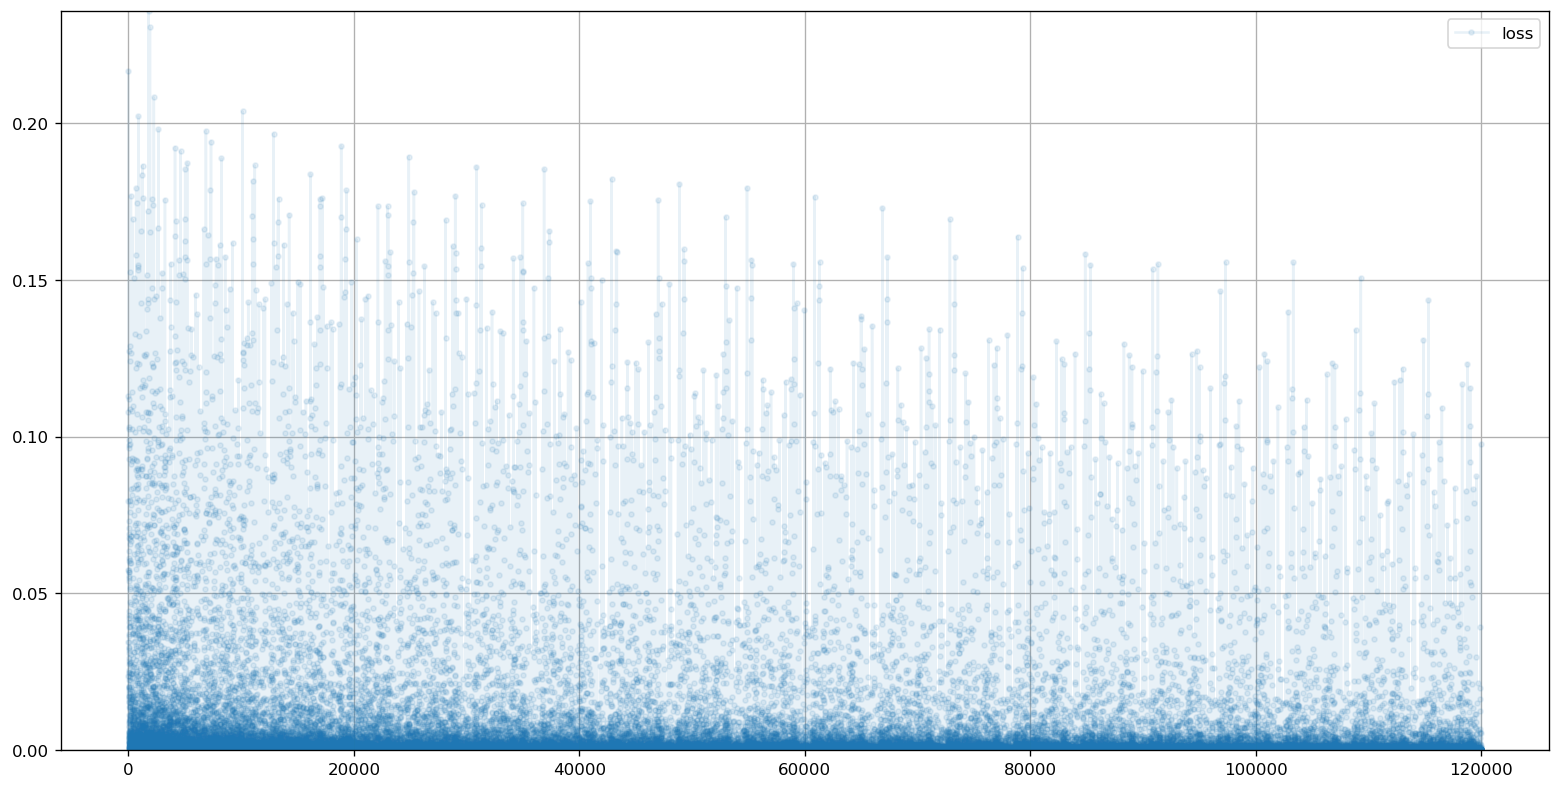

In [11]:
clf_dir = Path('./trained_classifiers')

# this one has max performance
clfname = clf_dir.joinpath(f'classifier_500_0.01_20.pkl')

with open(clfname, 'rb') as f:
    clf = pickle.load(f)
    
print(f"{clf.lr = }")
print(f"{clf.epochs = }")
print(f"{clf.hnodes = }")
print(f"{clf.performance = :.4f}")
print(f"{clf.training_time = :.2f}")

clf.plot_progress()

In [13]:
print(df.iloc[performance.argmin()].to_dict())

{
    'Unnamed: 0': 706.0,
    'hidden_nodes': 400.0,
    'learning_rate': 0.8,
    'epochs': 8.0,
    'performance': 0.7806,
    'training_time': 1827.82
}

In [14]:
training_time = df['training_time'].to_numpy()
print(f"Max training time: {training_time.max()/60:.2f} minutes.")

Max training time: 78.40 minutes.

In [15]:
print(df.iloc[training_time.argmax()].to_dict())

{
    'Unnamed: 0': 556.0,
    'hidden_nodes': 300.0,
    'learning_rate': 0.6,
    'epochs': 20.0,
    'performance': 0.9059,
    'training_time': 4704.15
}

In [16]:
print(df.iloc[training_time.argmin()].to_dict())

{
    'Unnamed: 0': 96.0,
    'hidden_nodes': 10.0,
    'learning_rate': 0.8,
    'epochs': 1.0,
    'performance': 0.8252,
    'training_time': 12.14
}

In [17]:
plt_kwargs = {
    'figsize':  (10, 6), 
    'marker':  's', 
    'ms':  8, 
    'ls': '--',
    'fontsize': 14,
}

font = font_manager.FontProperties(size=14)

In [18]:
def select_data(df, sdict):
    all_keys = ['hidden_nodes', 'learning_rate', 'epochs']
    k0, k1 = sdict.keys()
    v0, v1 = sdict.values()
    subdf = df[(df[k0]==v0) & (df[k1]==v1)]
    sort_key = list(set(all_keys) - set(sdict.keys()))[0]
    subdf = subdf.sort_values(by=sort_key)
    return subdf, sort_key

In [19]:
def plot_perf(subdf, sdict, sort_key):
    ax = subdf.plot(x=sort_key, y='performance', **plt_kwargs)
    plt.gcf().tight_layout()
    ax.set_title(f"{sdict}", fontsize=20)
    ax.grid(axis='y')
    ax.set_xlabel(sort_key.title(), fontsize=15)
    ax.set_ylabel('Performance', fontsize=15)
    ax.legend(prop=font)
    ax.set_xticks(eval(sort_key))

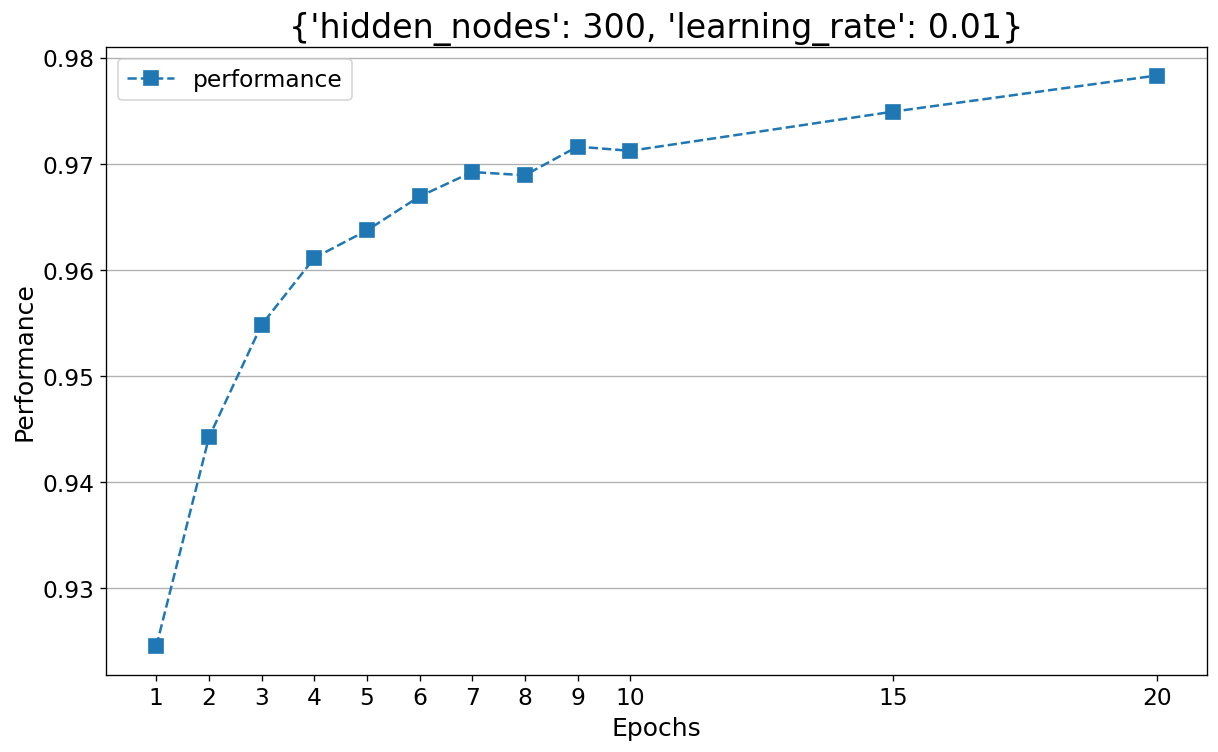

In [20]:
sdict = dict(hidden_nodes=300, learning_rate=0.01)
subdf, sort_key = select_data(df, sdict)
plot_perf(subdf, sdict, sort_key)

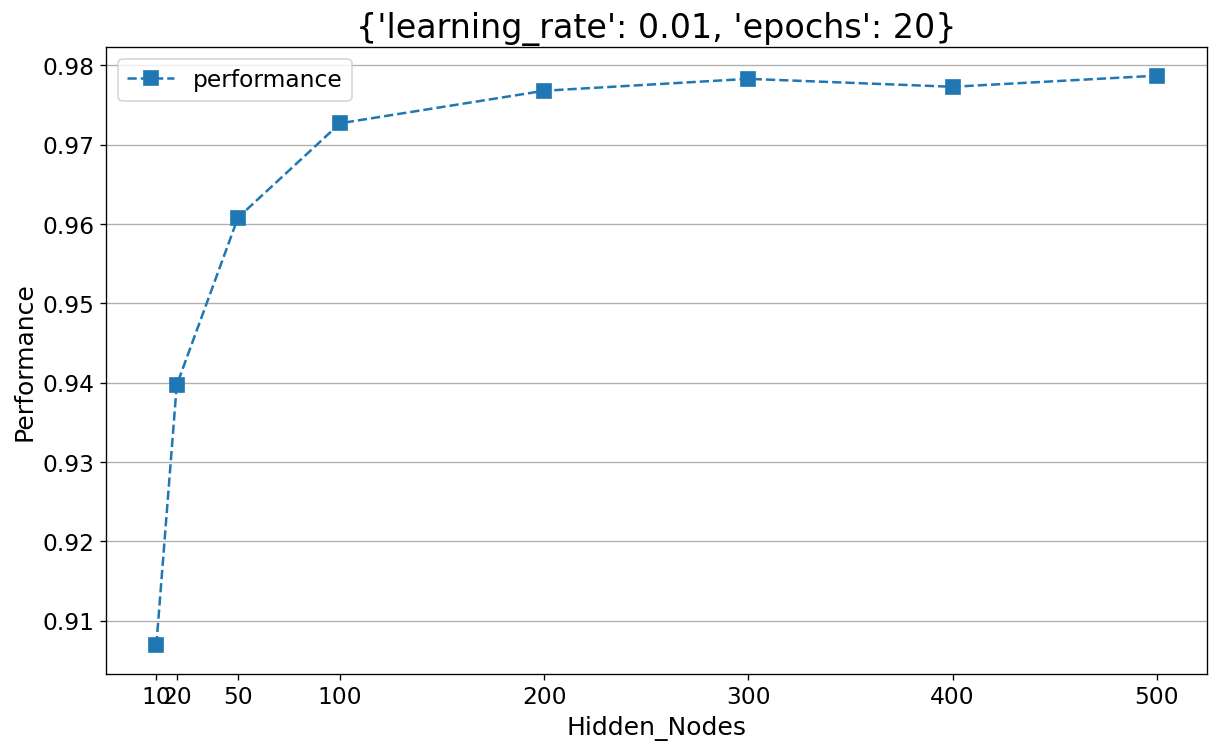

In [21]:
sdict = dict(learning_rate=0.01, epochs=20)
subdf, sort_key = select_data(df, sdict)
plot_perf(subdf, sdict, sort_key)

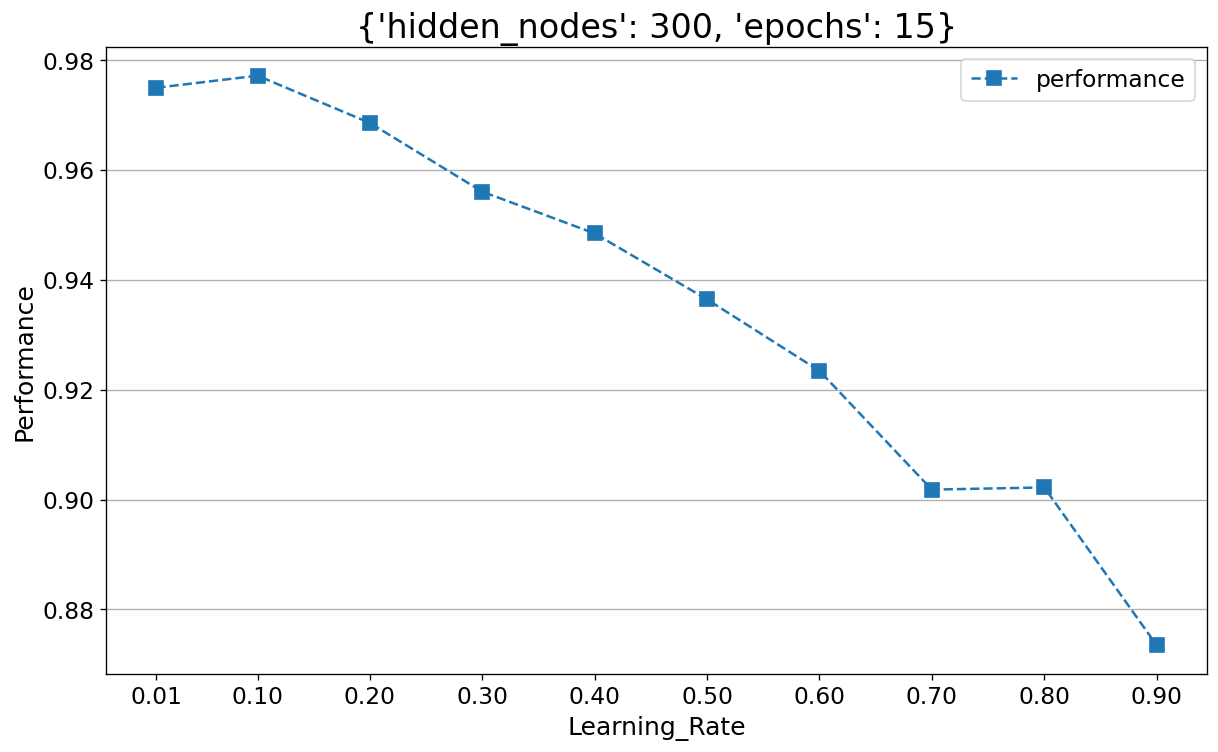

In [22]:
sdict = dict(hidden_nodes=300, epochs=15)
subdf, sort_key = select_data(df, sdict)
plot_perf(subdf, sdict, sort_key)

In [23]:
perfile_rot = "performance_rotation.csv"
df_rot = pd.read_csv(perfile_rot)
df_rot.columns = [col.strip() for col in df_rot.columns]

In [24]:
print(df_rot)

Unnamed: 0  angle  epochs  performance  training_time
0            0   10.0    10.0       0.9655        4308.17
1            1   10.0    13.0       0.9683        5794.66
2            2   10.0    15.0       0.9677        4933.18
3            3   10.0     5.0       0.9706        1698.50
4            4   10.0     7.0       0.9708        6361.15
5            5   12.0    10.0       0.9696        3994.71
6            6   12.0    13.0       0.9634        5544.12
7            7   12.0    15.0       0.9635       13447.64
8            8   12.0     5.0       0.9703        3867.56
9            9   12.0     7.0       0.9694        2470.89
10          10   15.0    10.0       0.9650        3036.04
11          11   15.0    13.0       0.9657       12302.95
12          12   15.0    15.0       0.9596        6086.54
13          13   15.0     5.0       0.9714        2363.68
14          14   15.0     7.0       0.9672        2763.16
15          15   20.0    10.0       0.9587        6863.36
16          16   20.0    13.0       0.9618        5623.21
17          17   20.0    15.0       0.9594        6173.89
18          18   20.0     5.0       0.9644        1725.35
19          19   20.0     7.0       0.9631        1287.02
20          20   25.0    10.0       0.9570        4133.76
21          21   25.0    13.0       0.9562        5755.04
22          22   25.0    15.0       0.9605        4987.15
23          23   25.0     5.0       0.9613        1683.05
24          24   25.0     7.0       0.9607        5834.13
25          25    3.0    10.0       0.9657        4098.42
26          26    3.0    13.0       0.9667        5594.41
27          27    3.0    15.0       0.9637       11640.03
28          28    3.0     5.0       0.9673        3978.70
29          29    3.0     7.0       0.9661        2411.09
30          30    5.0    10.0       0.9676        3506.11
31          31    5.0    13.0       0.9697       12163.61
32          32    5.0    15.0       0.9666        6412.24
33          33    5.0     5.0       0.9678        2266.52
34          34    5.0     7.0       0.9662        2930.00
35          35    7.0    10.0       0.9698        7084.49
36          36    7.0    13.0       0.9691        5417.95
37          37    7.0    15.0       0.9674        5997.12
38          38    7.0     5.0       0.9683        1870.16
39          39    7.0     7.0       0.9671        1162.42

In [25]:
angle = sorted([int(i) for i in set(df_rot['angle'].to_list())])
epochs = sorted([int(i) for i in set(df_rot['epochs'].to_list())])
print(f"{angle = }")
print(f"{epochs = }")

angle = [3, 5, 7, 10, 12, 15, 20, 25]

epochs = [5, 7, 10, 13, 15]

In [26]:
performance = df_rot['performance'].to_numpy()
print(f"{performance = }")

performance = array([0.9655, 0.9683, 0.9677, 0.9706, 0.9708, 0.9696, 0.9634, 0.9635,
       0.9703, 0.9694, 0.965 , 0.9657, 0.9596, 0.9714, 0.9672, 0.9587,
       0.9618, 0.9594, 0.9644, 0.9631, 0.957 , 0.9562, 0.9605, 0.9613,
       0.9607, 0.9657, 0.9667, 0.9637, 0.9673, 0.9661, 0.9676, 0.9697,
       0.9666, 0.9678, 0.9662, 0.9698, 0.9691, 0.9674, 0.9683, 0.9671])

In [27]:
print(df_rot.iloc[performance.argmax()].to_dict())

{'Unnamed: 0': 13.0, 'angle': 15.0, 'epochs': 5.0, 'performance': 0.9714, 'training_time': 2363.68}

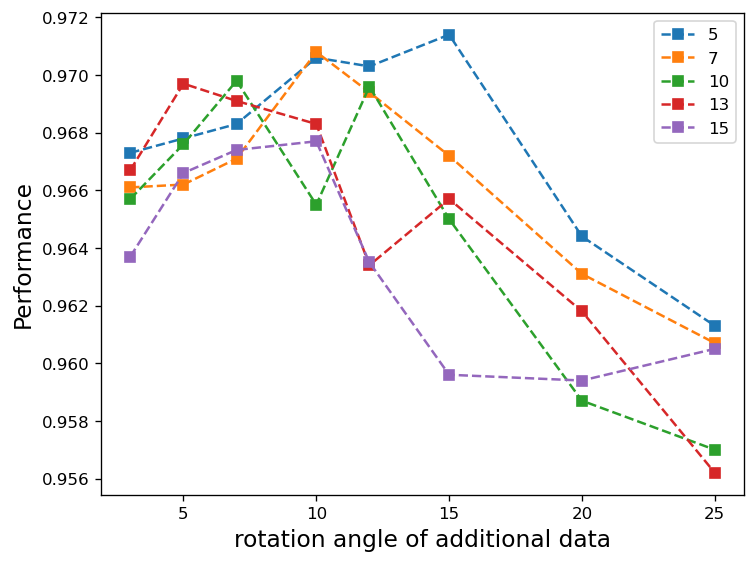

In [28]:
plt.figure()
for e in epochs:
    subdf = df_rot[df_rot['epochs']==e]
    subdf = subdf.sort_values(by='angle')
    performance = subdf['performance'].to_numpy()
    plt.plot(angle, performance, label=f'{e}', marker='s', ls='--')
plt.xlabel('rotation angle of additional data', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

### remove bad performance classifiers

In [ ]:
clf_list = list(clf_dir.glob('*.pkl'))

for clfname in clf_list:
    with open(clfname, 'rb') as f:
        clf = pickle.load(f)
    if clf.performance < 0.97:
        print(f"Removing {clfname}")
        clfname.unlink()

In [30]:
clf_list = list(clf_dir.glob('*.pkl'))

for clfname in clf_list:
    with open(clfname, 'rb') as f:
        clf = pickle.load(f)
    print(f"{clf.performance = :.4f}, {clf.hnodes = }, {clf.lr = :.2f}, {clf.epochs = }")

clf.performance = 0.9716, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 9

clf.performance = 0.9724, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 9

clf.performance = 0.9750, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 5

clf.performance = 0.9749, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 15

clf.performance = 0.9722, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 15

clf.performance = 0.9750, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 4

clf.performance = 0.9758, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 10

clf.performance = 0.9701, clf.hnodes = 300, clf.lr = 0.20, clf.epochs = 10

clf.performance = 0.9765, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 7

clf.performance = 0.9722, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 3

clf.performance = 0.9708, clf.hnodes = 400, clf.lr = 0.20, clf.epochs = 4

clf.performance = 0.9743, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 8

clf.performance = 0.9747, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 10

clf.performance = 0.9724, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 9

clf.performance = 0.9710, clf.hnodes = 500, clf.lr = 0.20, clf.epochs = 5

clf.performance = 0.9759, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 15

clf.performance = 0.9720, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 8

clf.performance = 0.9753, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9736, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 20

clf.performance = 0.9750, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 10

clf.performance = 0.9767, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 8

clf.performance = 0.9763, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 15

clf.performance = 0.9708, clf.hnodes = 300, clf.lr = 0.20, clf.epochs = 8

clf.performance = 0.9728, clf.hnodes = 400, clf.lr = 0.20, clf.epochs = 7

clf.performance = 0.9783, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9736, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 9

clf.performance = 0.9752, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9764, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 7

clf.performance = 0.9768, clf.hnodes = 200, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9783, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 15

clf.performance = 0.9706, clf.hnodes = 300, clf.lr = 0.20, clf.epochs = 4

clf.performance = 0.9719, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 9

clf.performance = 0.9714, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 20

clf.performance = 0.9746, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 8

clf.performance = 0.9751, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9704, clf.hnodes = 300, clf.lr = 0.20, clf.epochs = 3

clf.performance = 0.9758, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 8

clf.performance = 0.9735, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 20

clf.performance = 0.9727, clf.hnodes = 100, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9739, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 20

clf.performance = 0.9742, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 4

clf.performance = 0.9725, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 3

clf.performance = 0.9709, clf.hnodes = 200, clf.lr = 0.01, clf.epochs = 10

clf.performance = 0.9787, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9705, clf.hnodes = 500, clf.lr = 0.01, clf.epochs = 7

clf.performance = 0.9744, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 3

clf.performance = 0.9773, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 20

clf.performance = 0.9739, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 10

clf.performance = 0.9734, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 4

clf.performance = 0.9712, clf.hnodes = 300, clf.lr = 0.01, clf.epochs = 10

clf.performance = 0.9713, clf.hnodes = 400, clf.lr = 0.20, clf.epochs = 8

clf.performance = 0.9740, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 10

clf.performance = 0.9701, clf.hnodes = 300, clf.lr = 0.20, clf.epochs = 5

clf.performance = 0.9737, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 7

clf.performance = 0.9750, clf.hnodes = 200, clf.lr = 0.01, clf.epochs = 15

clf.performance = 0.9757, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 9

clf.performance = 0.9721, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 6

clf.performance = 0.9705, clf.hnodes = 200, clf.lr = 0.20, clf.epochs = 3

clf.performance = 0.9726, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 15

clf.performance = 0.9742, clf.hnodes = 500, clf.lr = 0.10, clf.epochs = 4

clf.performance = 0.9700, clf.hnodes = 500, clf.lr = 0.20, clf.epochs = 10

clf.performance = 0.9705, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 8

clf.performance = 0.9733, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 5

clf.performance = 0.9735, clf.hnodes = 400, clf.lr = 0.01, clf.epochs = 10

clf.performance = 0.9771, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 15

clf.performance = 0.9750, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 5

clf.performance = 0.9740, clf.hnodes = 200, clf.lr = 0.10, clf.epochs = 7

clf.performance = 0.9714, clf.hnodes = 500, clf.lr = 0.20, clf.epochs = 4

clf.performance = 0.9759, clf.hnodes = 400, clf.lr = 0.10, clf.epochs = 9

clf.performance = 0.9761, clf.hnodes = 300, clf.lr = 0.10, clf.epochs = 5

clf.performance = 0.9721, clf.hnodes = 400, clf.lr = 0.20, clf.epochs = 5

clf.performance = 0.9701, clf.hnodes = 200, clf.lr = 0.20, clf.epochs = 5

clf.performance = 0.9702, clf.hnodes = 400, clf.lr = 0.20, clf.epochs = 10